In [5]:
# Logistic Regression

# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
dataset = pd.read_csv('D:\Personal\Maestria BigData\Módulo 7. Data mining, machine learning y deep learning\Datos\Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values # Se predice usando solo las variables de Age y EstimatedSalary
y = dataset.iloc[:, 4].values

# Train/Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicciones
y_pred = classifier.predict(X_test) 

# Matriz de confusion
# se puede evaluar el rendimiento del modelo.
# basta con saber que los puntos de la diagonal de la matriz son los puntos que el modelo ha clasificado correctamente,
# mientras que los otros son los puntos que no se han clasificado bien.
# Se aprecia como el modelo clasifica correctamente casi todos los casos.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1],
       [ 5, 17]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


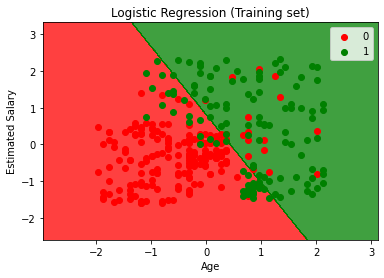

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


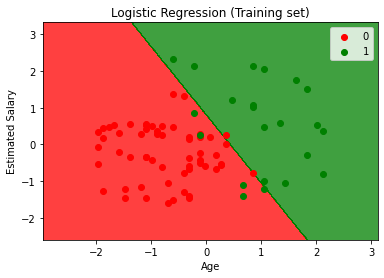

In [4]:
### Visualizacion
from matplotlib.colors import ListedColormap

def visualizacion(X,y):
    X_set, y_set = X, y #Creo unas variables auxiliares de apoyo
    
    # Se sacan las dos Xi usadas
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)) # Se preparan los grids con los pixel points. . El -1/+1 es para dejar algo de margen
    
    
    # Se pintan las regiones segun si estan por encima o no del clasificador                   
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # contourf para pintar el contorno. Uso mi funcion de clasificacion para pintar los puntos de un color u otro según sea la estimación
    
    # Con esto se permite embeber los siguientes puntos sobre el grafico anterior
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Se pintan los puntos
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j) # loop para pintar en el plot todos los puntos
    
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Train
visualizacion(X_train, y_train)

# Test
visualizacion(X_test, y_test)